# Deep Learning for Fonts | Fontastic

- Nischal HP | @nischalhp | VP, Engineering, omni:us

- Raghotham S | @raghothams | Senior Data Scientist, Ericsson Research

#### Strata Data Conference 2019, London

# Fontastic

## Motivation

<img src="imgs/london-bus.jpeg" alt="drawing" width="600"/>



# Fontastic

### Existing Tools | What The Font

<img src="imgs/whatthefont.png" alt="drawing" width="600"/>


# Fontastic

### Existing Tools | What Font is?

<img src="imgs/whatfontis-1.png" alt="drawing" width="800" style="alig:center"/>

# Fontastic

### Existing Tools | What Font is?

<img src="imgs/whatfontis-2.png" alt="drawing" width="800" style="alig:center"/>

# Fontastic

### Existing Tools | Matcherator

<img src="imgs/matcherator.png" alt="drawing" width="800" style="alig:center"/>


# Fontastic

## What do we aim to do?

# Deep Learning for Humans

* Fontastic



* Upcoming Projects

# Fontastic

## Agenda

* Why did we start?
* Data acquisition
* Model building
* Feature visualization

# Fontastic

## Data Acquisition

## Data Acquisition

### Pass 1: Scrape Font Squirel - https://www.fontsquirrel.com/

<img src="imgs/fontsquirrel.png" alt="drawing" width="800" style="alig:center"/>


**Problems**

1. We have images of different dimensions
2. Even with normalizing the size, we will end up with 5-10 images per style


## Data Acquisition

### Pass 2: Scrape DaFont - https://www.dafont.com/

<img src="imgs/dafont.png" alt="drawing" width="800" style="alig:center"/>



**Problems**

1. Old school fonts only, not updated frequently
2. Supports only wide dimension, might not work well with inteded end use



## Data Acquisition

### Pass 3: Generate Image using PIL

#### Steps

1. Create 4 set of random texts
2. Generate 4k resolution image of text using the TTF for every random text
3. Take 10 random crop of size 256x256 px from the 4k image

With this we have the ability to generate large number of training images 


## Data Acquisition

### Pass 3: Generate Image using PIL

#### Advantages

1. We control the input text
2. We control the font style and size
3. We control the output image dinemsion


## Data Acquisition

### Pass 3: Generate Image using PIL


<img src="imgs/pil-generated.jpg" alt="drawing" width="800" style="alig:center"/>


## Data Acquisition

### Pass 3: Generate Image using PIL + Random Crop


<img src="imgs/pil-rand-crop.png" alt="drawing" width="800" style="alig:center"/>


## Data Acquisition

### Pass 3: Generate Image using PIL + Random Crop


<img src="imgs/pil-rand-crop.png" alt="drawing" width="800" style="alig:center"/>


# Fontastic

## Model Building

## Feasibility Check - FastAI

## Model Building

### Pretrained ResNet50



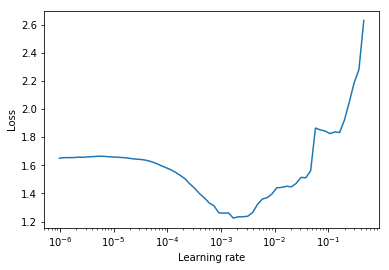

In [23]:
lrf.plot()

In [27]:
model_ft = train_model(model_ft, criterion, optimizer_ft, num_epochs=40)

Epoch 0/39
----------
train Loss: 1.4014 Acc:0.4685

test Loss: 1.1405 Acc:0.5600

Epoch 1/39
----------
train Loss: 0.9521 Acc:0.6126

test Loss: 433.0719 Acc:0.3960

Epoch 2/39
----------
train Loss: 0.9702 Acc:0.6076

test Loss: 0.9965 Acc:0.6120

Epoch 3/39
----------
train Loss: 0.6786 Acc:0.7287

test Loss: 2.2418 Acc:0.3600

Epoch 4/39
----------
train Loss: 0.6702 Acc:0.7377

test Loss: 1.0157 Acc:0.5920

Epoch 5/39
----------
train Loss: 0.4778 Acc:0.8228

test Loss: 3.1915 Acc:0.1920

Epoch 6/39
----------
train Loss: 0.4408 Acc:0.8338

test Loss: 1.0038 Acc:0.4880

Epoch 7/39
----------
train Loss: 0.3621 Acc:0.8709

test Loss: 1.0677 Acc:0.5240

Epoch 8/39
----------
train Loss: 0.4261 Acc:0.8619

test Loss: 0.8439 Acc:0.7800

Epoch 9/39
----------
train Loss: 0.3863 Acc:0.8659

test Loss: 0.9458 Acc:0.5920

Epoch 10/39
----------
train Loss: 0.3277 Acc:0.8809

test Loss: 1.5174 Acc:0.4440

Epoch 11/39
----------
train Loss: 0.4954 Acc:0.8148

test Loss: 1.3809 Acc:0.4280



KeyboardInterrupt: 

# Fontastic

## Feature Visualization 

## Feature Visualization 

### Gradcam Analysis

## Feature Visualization 

### Activation Atlas

# Extra
## Remote Work


## Open Source

# Fin.